In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [2]:
def run(circuit,backend):
    sampler = Sampler(mode=backend)
    job = sampler.run([circuit])
    result = job.result()
    counts = result[0].data.meas.get_counts()
    return counts

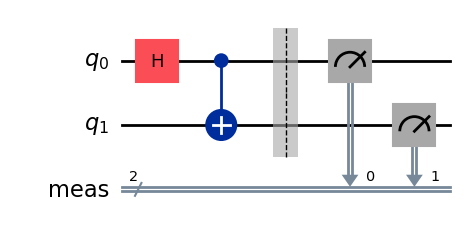

In [3]:
qc = QuantumCircuit(2)
qc.h(0)          # Hadamard on qubit 0
qc.cx(0, 1)      # CNOT from qubit 0 to 1
qc.measure_all() # Measure both qubits
qc.draw("mpl")

In [4]:
sim_backend = Aer.get_backend('qasm_simulator')

service = QiskitRuntimeService()
print(service.backends())
real_backend = service.least_busy(simulator=False, operational=True)
print(f"Running on backend: {real_backend.name}")

[<IBMBackend('ibm_torino')>, <IBMBackend('ibm_brisbane')>]
Running on backend: ibm_brisbane


Simulator counts: {'11': 512, '00': 512}


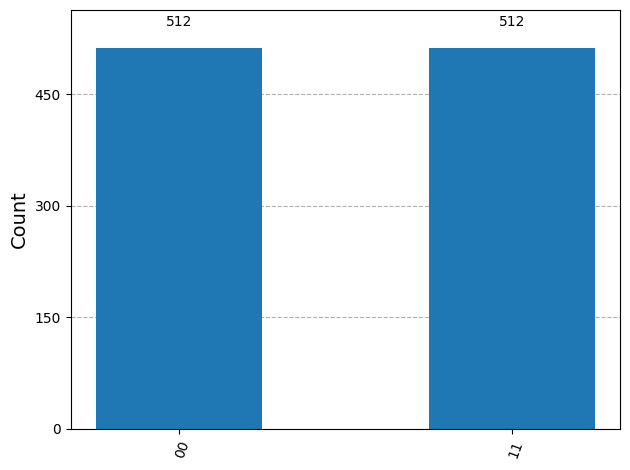

In [5]:
sim_counts = run(qc, sim_backend)
print("Simulator counts:", sim_counts)
plot_histogram(sim_counts)

Real hardware counts: {'11': 2009, '00': 2003, '10': 47, '01': 37}


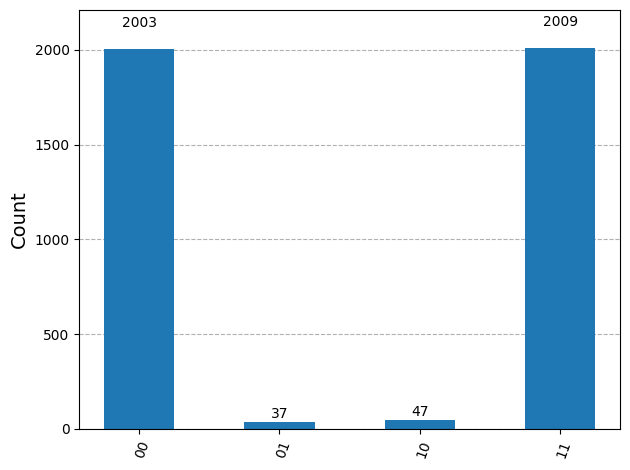

In [6]:
tqc = transpile(qc, real_backend)
real_counts = run(tqc, real_backend)
print("Real hardware counts:", real_counts)
plot_histogram(real_counts)